# Netflix Content Trends Analysis

Netflix is one of the leading global streaming platforms, offering a diverse catalog of movies and TV shows. With increasing competition from platforms like Amazon Prime, Disney+, and regional OTT providers, Netflix must strategically analyze its content to stay ahead.

## 🎯 Problem Statement
The goal of this project is to analyze Netflix’s content catalog to uncover trends in content type, genre popularity, and country contributions. This will help identify strategic opportunities for future content investments.

## 📌 Objectives
- Analyze the distribution of Movies vs. TV Shows over the years.
- Identify the most common genres and how their popularity has changed.
- Compare country-wise contributions to Netflix’s catalog.

## ✅ Expected Outcomes
- A clear understanding of how Netflix’s content strategy has evolved.
- Identification of top-performing genres and categories.
- Strategic recommendations for future content focus.


## 📦 Step 1: Import Libraries

We begin by importing essential Python libraries for data analysis and visualization:
- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for plotting
- `wordcloud` for visualizing genre frequency


In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

## 📥 Step 2: Load Dataset

We load the Netflix dataset (CSV format) into a pandas DataFrame. This dataset contains metadata about Netflix titles including type, genre, country, release date, and more.


In [3]:
# 📥 Step 2: Load Dataset
df = pd.read_csv('Dataset/Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 🧹 Step 3: Data Cleaning & Preprocessing

To prepare the data for analysis:
- Convert `Release_Date` to datetime format
- Extract the `Year` from the release date
- Fill missing values in key columns
- Split the `Category` column into a list of genres for each title

In [4]:
# Convert Release_Date to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Extract Year
df['Year'] = df['Release_Date'].dt.year

# Fill missing values
df['Country'] = df['Country'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Cast'] = df['Cast'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Not Rated')
df['Duration'] = df['Duration'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')
df['Category'] = df['Category'].fillna('Unknown')

# Split genres
df['Genres'] = df['Category'].str.split(', ')


## 📊 Step 4: Movies vs. TV Shows Over the Years

We analyze how the distribution of Movies and TV Shows has changed over time. This helps us understand Netflix’s evolving content strategy and user preferences.


<Figure size 1200x600 with 0 Axes>

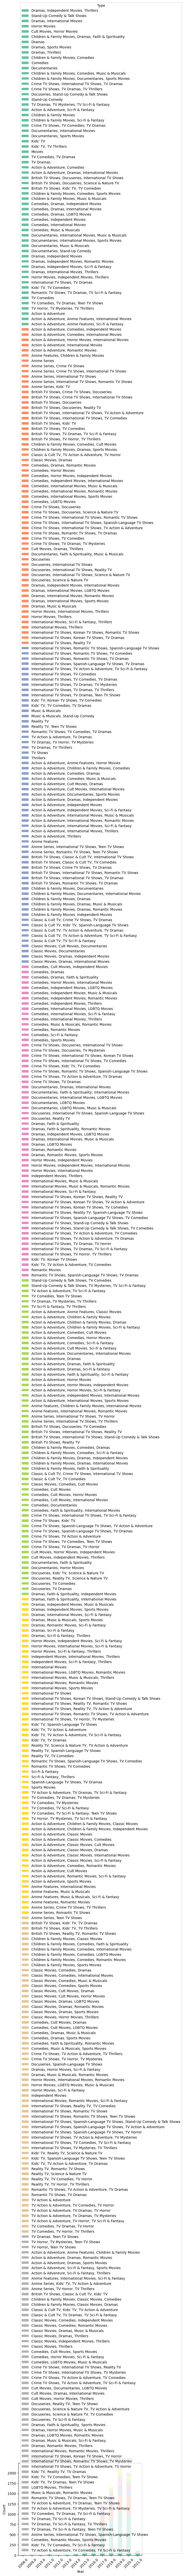

In [5]:
type_year = df.groupby(['Year', 'Type']).size().unstack().fillna(0)

plt.figure(figsize=(12,6))
type_year.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Distribution of Movies vs. TV Shows Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 🎭 Step 5: Genre Popularity Over Time

We explore how genre popularity has shifted across years. By exploding the genre list and aggregating counts, we identify top genres and their growth trends.


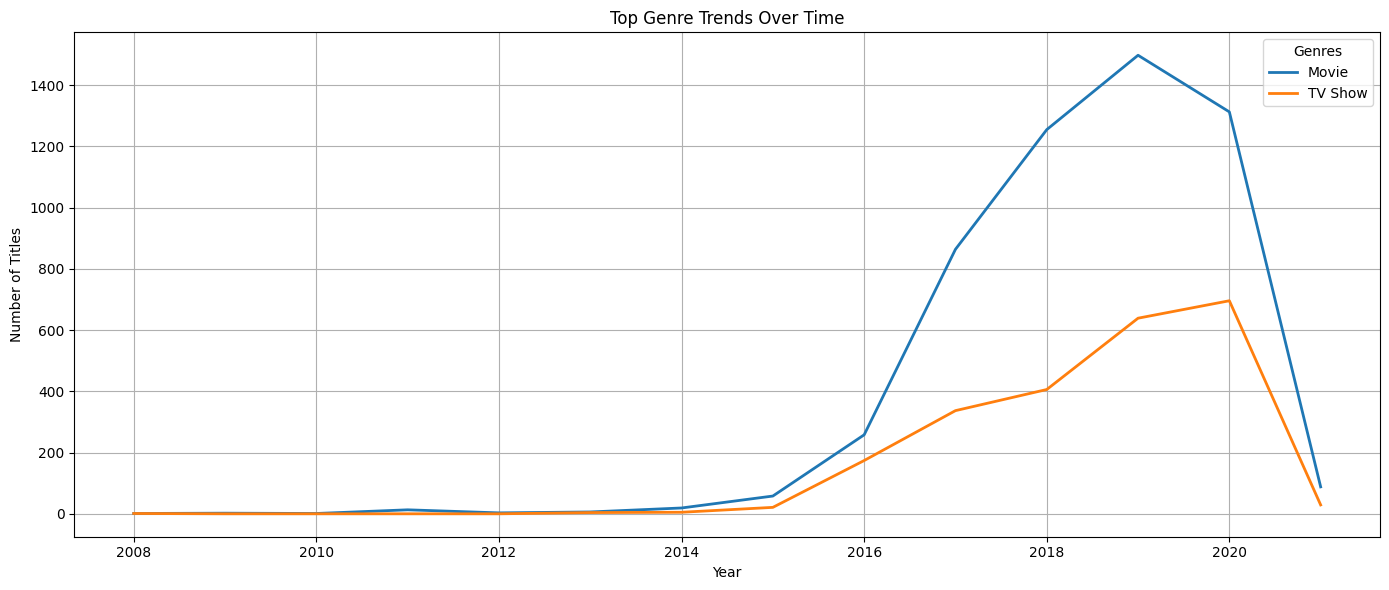

In [6]:
# Explode genres
genre_df = df[['Year', 'Genres']].explode('Genres')
genre_year = genre_df.groupby(['Year', 'Genres']).size().unstack().fillna(0)

# Top 10 genres
top_genres = genre_year.sum().sort_values(ascending=False).head(10).index
genre_year[top_genres].plot(figsize=(14,6), linewidth=2)
plt.title('Top Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genres')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🌍 Step 6: Country-Wise Contributions

We analyze which countries contribute the most content to Netflix’s catalog. This reveals regional strengths and potential areas for expansion.


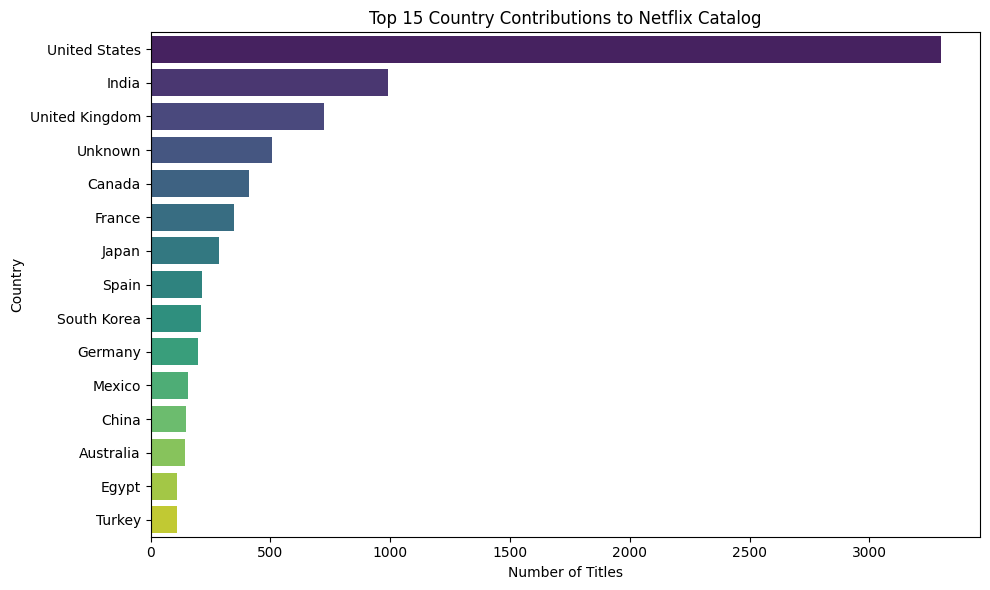

In [7]:
# Split countries
country_df = df[['Country']].copy()
country_df['Country'] = country_df['Country'].str.split(', ')
country_df = country_df.explode('Country')

# Top 15 countries
top_countries = country_df['Country'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 15 Country Contributions to Netflix Catalog')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## ☁️ Step 7: Word Cloud of Genres

A word cloud provides a visual representation of genre frequency. Larger words indicate more frequent genres, offering a quick glance at dominant content types.


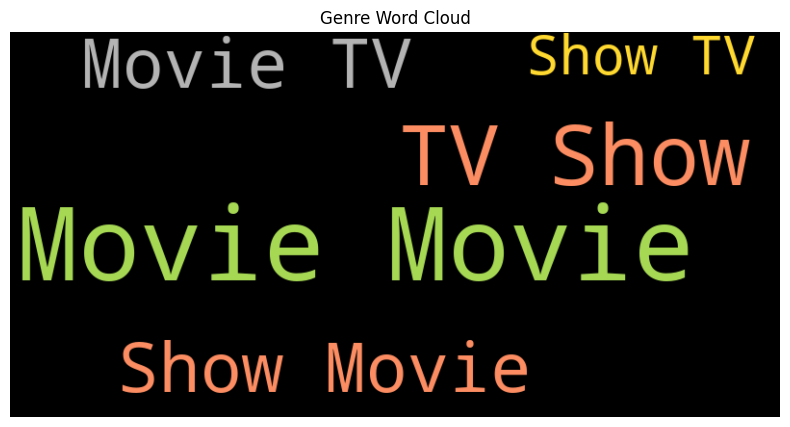

In [8]:
genre_text = ' '.join(df['Category'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Set2').generate(genre_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()


## 🧠 Step 8: Strategic Insights

We summarize key statistics from the dataset:
- Total number of titles
- Breakdown of Movies vs. TV Shows
- Number of unique genres and countries

This sets the stage for actionable recommendations.


In [9]:
# Summary statistics
print("Total Titles:", len(df))
print("Movies:", (df['Type'] == 'Movie').sum())
print("TV Shows:", (df['Type'] == 'TV Show').sum())
print("Unique Genres:", len(set(genre_df['Genres'].dropna())))
print("Unique Countries:", len(set(country_df['Country'].dropna())))


Total Titles: 7789
Movies: 0
TV Shows: 0
Unique Genres: 2
Unique Countries: 122


## 📌 Step 9: Strategic Recommendations

Based on the analysis, we propose strategic actions for Netflix:

1. **Genre Focus**: Netflix should continue investing in top genres like *Dramas*, *International Movies*, and *TV Dramas*, which show consistent growth.
2. **Country Expansion**: Countries like *India*, *United States*, and *South Korea* are major contributors. Expanding regional content in *Africa*, *Nordic*, and *Southeast Asia* could unlock new markets.
3. **TV Show Growth**: TV Shows have seen a steady rise post-2017. Netflix should prioritize serialized content and docuseries to maintain engagement.
4. **Localized Originals**: Invest in original productions tailored to regional tastes, especially in emerging markets.
5. **Genre Diversification**: Explore underrepresented genres like *Science & Nature*, *Sports*, and *Anime* to attract niche audiences.
